In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, spearmanr

In [2]:
df = pd.read_csv('financial_risk_assessment.csv')

print(df.shape)           
print(df.columns)         
print(df.head())          

(15000, 21)
Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating',
       'Risk Rating Numeric'],
      dtype='object')
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  ...  \
0      45713.0     Business        Unem

Mini-Study 1: Gender vs. Risk Rating


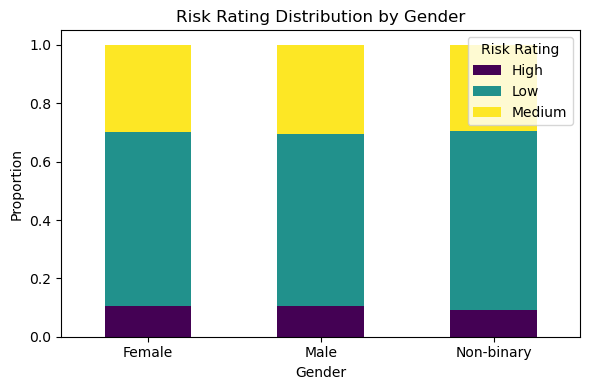

Chi-square test: chi2 = 7.678, p = 0.1041
ANOVA F-test: F = 3.576, p = 0.0280


In [3]:
#Mini-Study 1: Gender vs. Risk Rating

# טבלת שכיחות של Risk לפי מגדר
risk_table = pd.crosstab(df['Gender'], df['Risk Rating'])
risk_table_percent = pd.crosstab(df['Gender'], df['Risk Rating'], normalize='index')

# מבחן חי־בריבוע
chi2, p, dof, expected = chi2_contingency(risk_table)

# גרף Bar Stack לפי מגדר
risk_table_percent.plot(kind='bar', stacked=True, figsize=(6,4), colormap='viridis')
plt.title("Risk Rating Distribution by Gender")
plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.legend(title="Risk Rating")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# מבחן ANOVA בין Gender ל־Risk Rating Numeric (אופציונלי)
groups = [group['Risk Rating Numeric'].dropna() for name, group in df.groupby('Gender')]
anova_result = f_oneway(*groups)

# תוצאות
print(f"Chi-square test: chi2 = {chi2:.3f}, p = {p:.4f}")
print(f"ANOVA F-test: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")


C:\Users\home\AppData\Local\Temp\ipykernel_25820\2698817851.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Gender', y='Credit Score', palette='Set2')


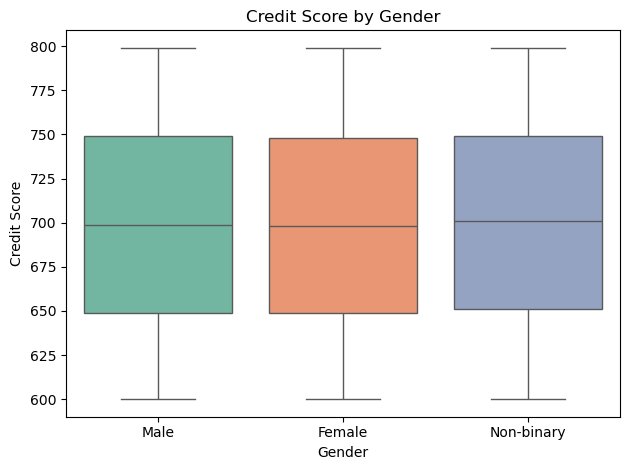

ANOVA: F = 0.606, p = 0.5455

ממוצעים לפי מגדר:
Gender
Female        698.492822
Male          698.985245
Non-binary    699.839265
Name: Credit Score, dtype: float64

סטיית תקן לפי מגדר:
Gender
Female        57.252184
Male          57.702627
Non-binary    56.745810
Name: Credit Score, dtype: float64


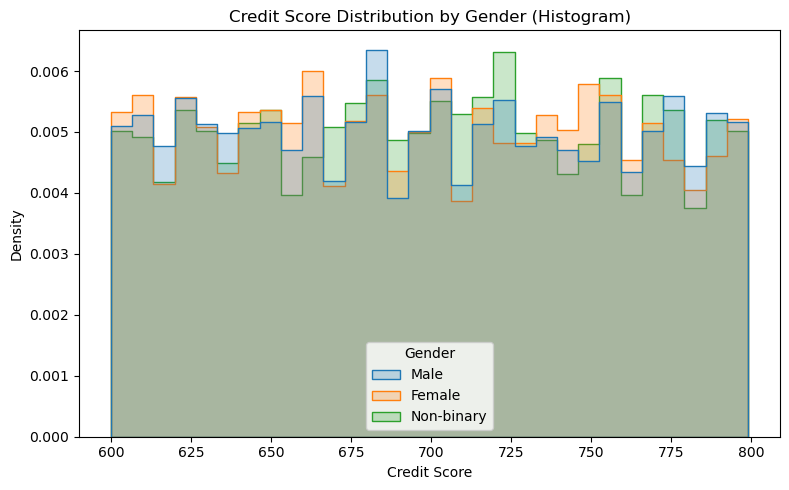

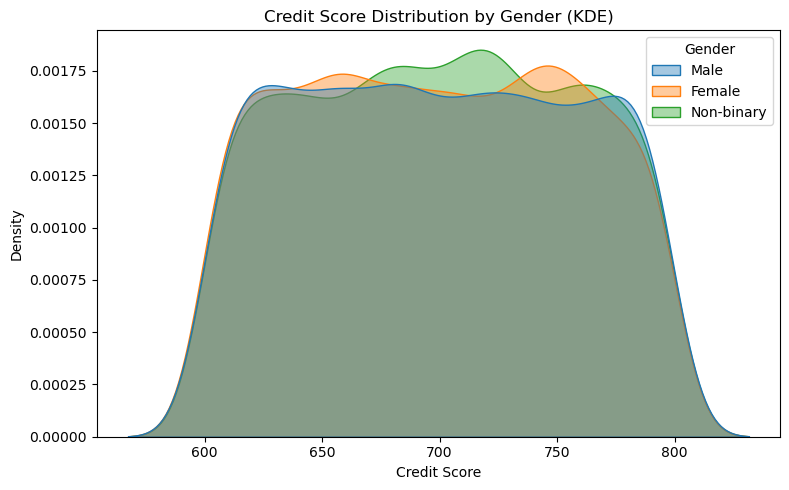

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# סינון ערכים חסרים
filtered_df = df[['Gender', 'Credit Score']].dropna()

# גרף Boxplot
sns.boxplot(data=filtered_df, x='Gender', y='Credit Score', palette='Set2')
plt.title("Credit Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

# ANOVA: השוואת ממוצעים
groups = [group['Credit Score'] for name, group in filtered_df.groupby('Gender')]
anova_result = f_oneway(*groups)

# סטטיסטיקות תיאוריות לפי מגדר
group_means = filtered_df.groupby('Gender')['Credit Score'].mean()
group_std = filtered_df.groupby('Gender')['Credit Score'].std()

# תוצאות
print(f"ANOVA: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")
print("\nממוצעים לפי מגדר:")
print(group_means)
print("\nסטיית תקן לפי מגדר:")
print(group_std)

import seaborn as sns
import matplotlib.pyplot as plt

# סינון ערכים חסרים
score_df = df[['Gender', 'Credit Score']].dropna()

# 🔹 היסטוגרמה לפי מגדר
plt.figure(figsize=(8,5))
sns.histplot(data=score_df, x='Credit Score', hue='Gender', bins=30, kde=False, element='step', stat='density', common_norm=False)
plt.title("Credit Score Distribution by Gender (Histogram)")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# 🔸 KDE לפי מגדר (עקומת צפיפות חלקה)
plt.figure(figsize=(8,5))
sns.kdeplot(data=score_df, x='Credit Score', hue='Gender', fill=True, alpha=0.4)
plt.title("Credit Score Distribution by Gender (KDE)")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


Mini-Study 2: Income vs. Risk Rating

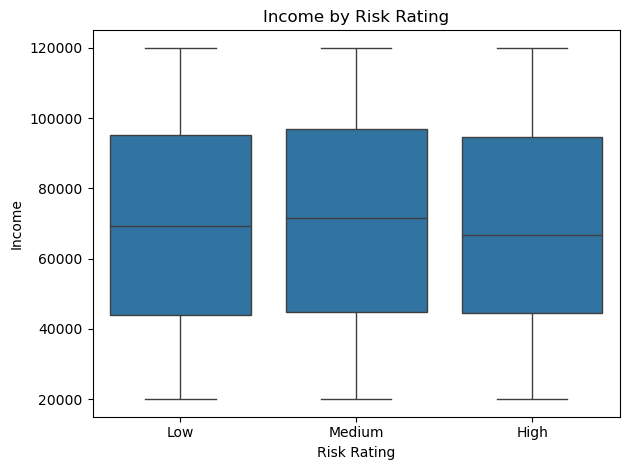

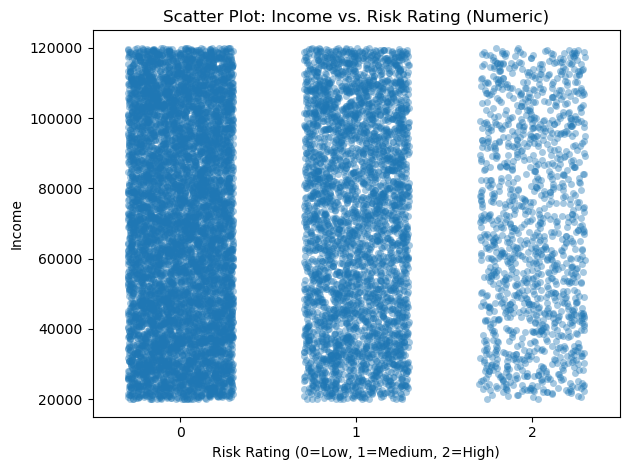

ANOVA: F = 3.006, p = 0.0495
Spearman Correlation: r = 0.009, p = 0.3055


In [5]:


# יצירת עמודת Risk Rating Numeric אם עוד לא קיימת
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk Rating Numeric'] = df['Risk Rating'].map(risk_mapping)

# 🎨 Boxplot של הכנסה לפי דירוג סיכון
sns.boxplot(data=df, x='Risk Rating', y='Income')
plt.title("Income by Risk Rating")
plt.ylabel("Income")
plt.xlabel("Risk Rating")
plt.tight_layout()
plt.show()

# מסנן שורות עם ערכים חסרים (למניעת בעיות)
scatter_df = df[['Income', 'Risk Rating Numeric']].dropna()

# גרף scatter עם jitter קל כדי לראות צפיפות
sns.stripplot(data=scatter_df, x='Risk Rating Numeric', y='Income', jitter=0.3, alpha=0.4)
plt.title("Scatter Plot: Income vs. Risk Rating (Numeric)")
plt.xlabel("Risk Rating (0=Low, 1=Medium, 2=High)")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

# 📊 ANOVA: האם ההכנסה שונה בין קבוצות סיכון
groups = [group['Income'].dropna() for name, group in df.groupby('Risk Rating')]
anova_result = f_oneway(*groups)

# 📈 Spearman מתאם: טיפול בערכים חסרים
filtered_df = df[['Income', 'Risk Rating Numeric']].dropna()
spearman_corr, spearman_p = spearmanr(filtered_df['Income'], filtered_df['Risk Rating Numeric'])

# 🖨️ תוצאות
print(f"ANOVA: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")
print(f"Spearman Correlation: r = {spearman_corr:.3f}, p = {spearman_p:.4f}")


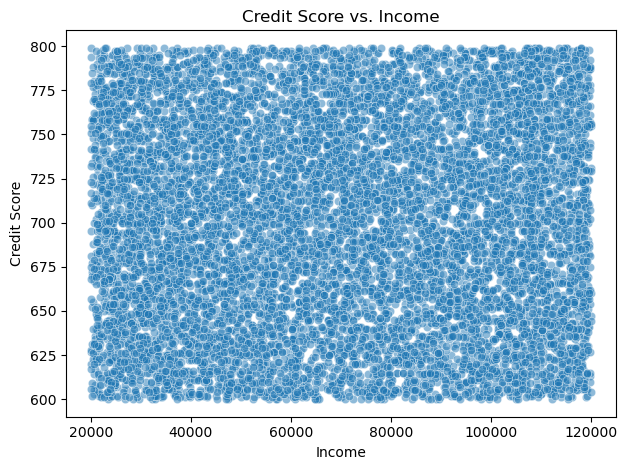

C:\Users\home\AppData\Local\Temp\ipykernel_25820\4211326033.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_per_group = df.groupby('Income Group')['Credit Score'].mean()


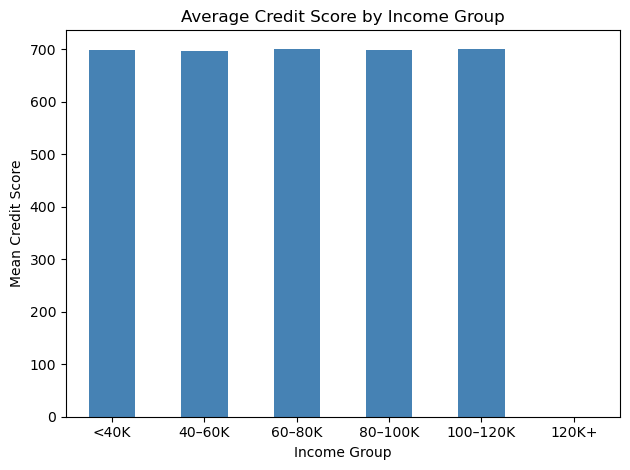

Pearson Correlation: r = 0.013, p = 0.1865
Spearman Correlation: r = 0.013, p = 0.1919


In [6]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# סינון ערכים חסרים
credit_income_df = df[['Income', 'Credit Score']].dropna()

# גרף פיזור
sns.scatterplot(data=credit_income_df, x='Income', y='Credit Score', alpha=0.5)
plt.title("Credit Score vs. Income")
plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

# צור קבוצות הכנסה
income_bins = [0, 40000, 60000, 80000, 100000, 120000, 200000]
income_labels = ['<40K', '40–60K', '60–80K', '80–100K', '100–120K', '120K+']
df['Income Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# חשב ממוצע דירוג אשראי לכל קבוצת הכנסה
avg_score_per_group = df.groupby('Income Group')['Credit Score'].mean()

# גרף עמודות
avg_score_per_group.plot(kind='bar', color='steelblue')
plt.title("Average Credit Score by Income Group")
plt.ylabel("Mean Credit Score")
plt.xlabel("Income Group")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# חישוב מתאם Pearson
pearson_corr, pearson_p = pearsonr(credit_income_df['Income'], credit_income_df['Credit Score'])

# חישוב מתאם Spearman (למקרה שהקשר לא ליניארי)
spearman_corr, spearman_p = spearmanr(credit_income_df['Income'], credit_income_df['Credit Score'])

# תצוגה
print(f"Pearson Correlation: r = {pearson_corr:.3f}, p = {pearson_p:.4f}")
print(f"Spearman Correlation: r = {spearman_corr:.3f}, p = {spearman_p:.4f}")


Income VS Risk Rating 

C:\Users\home\AppData\Local\Temp\ipykernel_25820\589925557.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_risk_score, x='Risk Rating', y='Credit Score', palette='Set3')


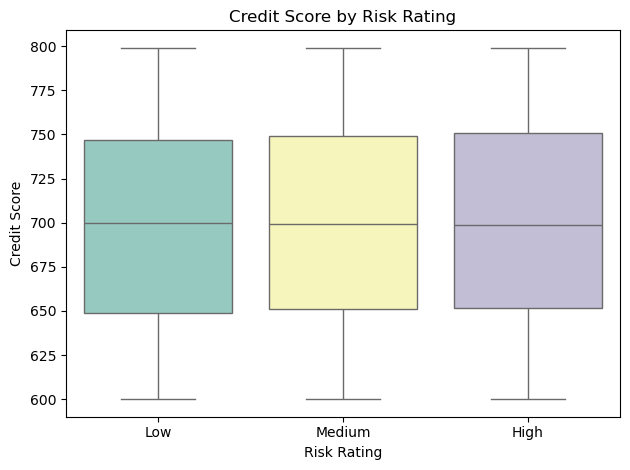

C:\Users\home\AppData\Local\Temp\ipykernel_25820\589925557.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=risk_score_df, x='Risk Rating', y='Credit Score', ci='sd', capsize=0.2, color='darkblue')


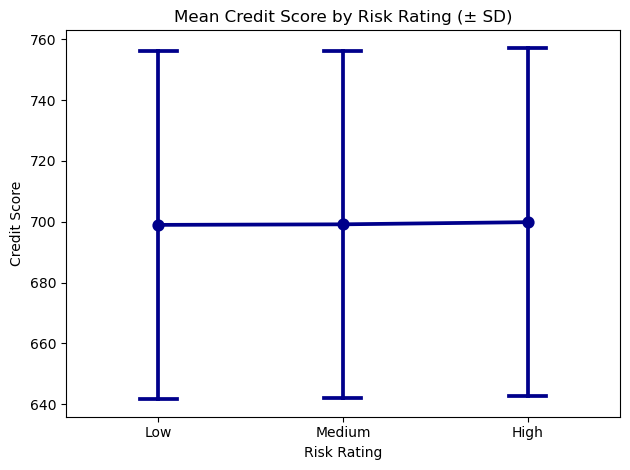

ANOVA: F = 0.136, p = 0.8725

ממוצע דירוג אשראי לפי רמות סיכון:
Risk Rating
High      699.862150
Low       698.964495
Medium    699.146124
Name: Credit Score, dtype: float64

סטיית תקן:
Risk Rating
High      57.309341
Low       57.316471
Medium    57.039849
Name: Credit Score, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# סינון ערכים חסרים
df_risk_score = df[['Risk Rating', 'Credit Score']].dropna()

# Boxplot
sns.boxplot(data=df_risk_score, x='Risk Rating', y='Credit Score', palette='Set3')
plt.title("Credit Score by Risk Rating")
plt.xlabel("Risk Rating")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

# סינון ערכים חסרים
risk_score_df = df[['Risk Rating', 'Credit Score']].dropna()

# גרף ממוצעים עם שגיאת תקן
sns.pointplot(data=risk_score_df, x='Risk Rating', y='Credit Score', ci='sd', capsize=0.2, color='darkblue')

plt.title("Mean Credit Score by Risk Rating (± SD)")
plt.xlabel("Risk Rating")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

# ANOVA
groups = [group['Credit Score'] for name, group in df_risk_score.groupby('Risk Rating')]
anova_result = f_oneway(*groups)

# סטטיסטיקות תיאוריות
means = df_risk_score.groupby('Risk Rating')['Credit Score'].mean()
stds = df_risk_score.groupby('Risk Rating')['Credit Score'].std()

# הדפסת תוצאות
print(f"ANOVA: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")
print("\nממוצע דירוג אשראי לפי רמות סיכון:")
print(means)
print("\nסטיית תקן:")
print(stds)


TEST 3

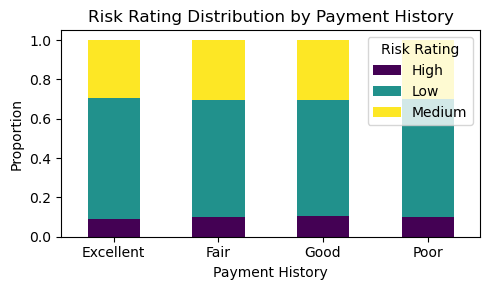

Chi-Square Test: χ² = 5.229, p = 0.5148


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# סינון ערכים חסרים
df_3a = df[['Payment History', 'Risk Rating']].dropna()

# טבלת שכיחויות יחסיות
ct = pd.crosstab(df_3a['Payment History'], df_3a['Risk Rating'], normalize='index')

# גרף bar stack
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(5,3))
plt.title("Risk Rating Distribution by Payment History")
plt.ylabel("Proportion")
plt.xlabel("Payment History")
plt.legend(title="Risk Rating")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# מבחן חי־בריבוע
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_3a['Payment History'], df_3a['Risk Rating']))
print(f"Chi-Square Test: χ² = {chi2:.3f}, p = {p:.4f}")


C:\Users\home\AppData\Local\Temp\ipykernel_25820\3349617639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_3b, x='Payment History', y='Credit Score', palette='Set2')


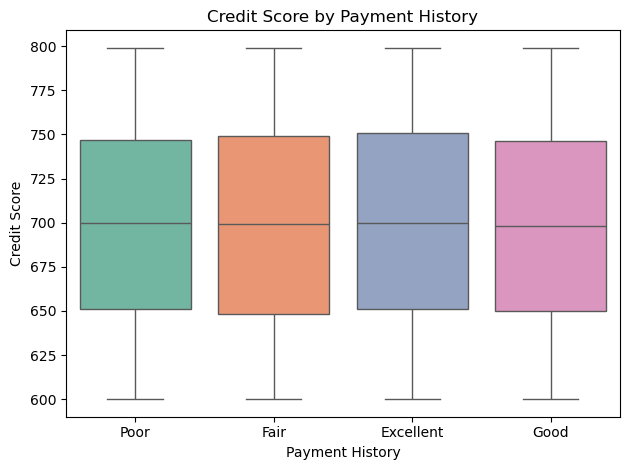

ANOVA: F = 0.668, p = 0.5716

ממוצעים:
Payment History
Excellent    700.062734
Fair         698.723160
Good         698.187827
Poor         699.474635
Name: Credit Score, dtype: float64

סטיית תקן:
Payment History
Excellent    57.562363
Fair         57.513571
Good         56.610618
Poor         57.250709
Name: Credit Score, dtype: float64


In [10]:
from scipy.stats import f_oneway

# סינון ערכים חסרים
df_3b = df[['Payment History', 'Credit Score']].dropna()

# גרף boxplot
sns.boxplot(data=df_3b, x='Payment History', y='Credit Score', palette='Set2')
plt.title("Credit Score by Payment History")
plt.xlabel("Payment History")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

# ANOVA
groups = [g['Credit Score'] for _, g in df_3b.groupby('Payment History')]
anova_result = f_oneway(*groups)

# ממוצעים וסטיות תקן
means = df_3b.groupby('Payment History')['Credit Score'].mean()
stds = df_3b.groupby('Payment History')['Credit Score'].std()

# הדפסת תוצאות
print(f"ANOVA: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")
print("\nממוצעים:")
print(means)
print("\nסטיית תקן:")
print(stds)


TEST 4

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# משתנים
target = 'Credit Score'
features = ['Income', 'Debt-to-Income Ratio', 'Assets Value', 
            'Payment History', 'Employment Status', 'Education Level', 'Gender']

# שמירה על תת־מסגרת נתונים תקינה
df_model = df[features + [target]].dropna()

# הפרדת משתנים קטגוריאליים
categorical = ['Payment History', 'Employment Status', 'Education Level', 'Gender']
numerical = ['Income', 'Debt-to-Income Ratio', 'Assets Value']

# המרת קטגוריות ל-One-Hot
df_encoded = pd.get_dummies(df_model, columns=categorical, drop_first=True)

# הפרדה ל־X ו־y
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# חלוקה לרכבת/בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# רגרסיה ליניארית
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# תוצאות
print(f"R² score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

# תרומת כל משתנה
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs = coeffs.sort_values(key=abs, ascending=False)
print("\nהשפעת כל משתנה על דירוג האשראי:")
print(coeffs)


R² score: 0.0005
MSE: 3236.17

השפעת כל משתנה על דירוג האשראי:
Education Level_PhD                3.308088
Debt-to-Income Ratio              -2.838178
Gender_Non-binary                  2.825756
Payment History_Good              -2.736170
Education Level_Master's           1.511499
Employment Status_Self-employed   -1.214095
Payment History_Fair              -0.873090
Employment Status_Unemployed       0.836826
Gender_Male                        0.811530
Education Level_High School        0.444356
Payment History_Poor              -0.360748
Income                             0.000015
Assets Value                       0.000008
dtype: float64


In [14]:
import pandas as pd
import statsmodels.api as sm

# נבחר עמודות רלוונטיות בלבד
features = ['Income', 'Debt-to-Income Ratio', 'Assets Value',
            'Payment History', 'Employment Status', 'Education Level', 'Gender']
target = 'Risk Rating'

# שלב 1: ניקוי והמרה
df_log = df[features + [target]].dropna().copy()
df_log['Risk Rating Numeric'] = df_log['Risk Rating'].map({'Low': 0, 'Medium': 1, 'High': 2})

# שלב 2: קידוד One-Hot
df_encoded = pd.get_dummies(df_log.drop(columns=['Risk Rating']), 
                            columns=['Payment History', 'Employment Status', 'Education Level', 'Gender'], 
                            drop_first=True)

# שלב 3: הכנה לרגרסיה
X = sm.add_constant(df_encoded)
X = X.astype(float)  # המרה מפורשת ל-float
y = df_log['Risk Rating Numeric'].astype(int)  # ודא שהוא מספרי

# שלב 4: רגרסיה לוגיסטית מרובת קטגוריות
model = sm.MNLogit(y, X)
result = model.fit()

# שלב 5: תצוגת תוצאות
print(result.summary())


C:\Users\home\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
C:\Users\home\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 21
                           MNLogit Regression Results                          
Dep. Variable:     Risk Rating Numeric   No. Observations:                10829
Model:                         MNLogit   Df Residuals:                    10799
Method:                            MLE   Df Model:                           28
Date:                 Sat, 14 Jun 2025   Pseudo R-squ.:                     nan
Time:                         12:35:31   Log-Likelihood:                    nan
converged:                        True   LL-Null:                       -9688.4
Covariance Type:             nonrobust   LLR p-value:                       nan
          Risk Rating Numeric=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                                  nan        nan        n